In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
heart_disease = pd.read_csv("92 - heart-disease.csv")
heart_disease.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1


In [3]:
# training parameters feature matrix
X = heart_disease.drop(columns="target")
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [4]:
# prediction parameter label matrix
y = heart_disease.target
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [5]:
# Choose the right model and hyper parameters 
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier() 

# Keep the default parameters  
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# 3. fit the model 
# split data into train test split  
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)

# fit model 
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [7]:
# 4. prediction  
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

In [8]:
# model validation 
clf.score(X_train,Y_train)
clf.score(X_test, Y_test)

0.8688524590163934

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

print(classification_report(Y_test, y_preds))
print(confusion_matrix(Y_test, y_preds))
print(accuracy_score(Y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88        31
           1       0.89      0.83      0.86        30

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

[[28  3]
 [ 5 25]]
0.8688524590163934


In [10]:
# 5. improve model  
# try different amount of hyperparameters 
for i in range(10,100, 20):
    print(f"trying n_estimater value to be {i}")
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, Y_train)
    y_preds = clf.predict(X_test)
    print(f"The score with n_estimator {i} = {accuracy_score(Y_test, y_preds)}")
    print()
    

trying n_estimater value to be 10
The score with n_estimator 10 = 0.8524590163934426

trying n_estimater value to be 30
The score with n_estimator 30 = 0.8688524590163934

trying n_estimater value to be 50
The score with n_estimator 50 = 0.9016393442622951

trying n_estimater value to be 70
The score with n_estimator 70 = 0.8688524590163934

trying n_estimater value to be 90
The score with n_estimator 90 = 0.8852459016393442



In [11]:
# save a model and load it
import pickle 

pickle.dump(clf , open("random_classifier_model_1.pkl", "wb"))

In [12]:
loaded_model = pickle.load(open("random_classifier_model_1.pkl", "rb"))
loaded_model.score(X_test, Y_test)

0.8852459016393442

## 1. Getting our data ready to be used with machine learning 

Three main things we have to do:

    1. Split the data into features and labels (usually X and y) 
    2. Filling (also called imputing) or disregarding missing data. 
    3. Converting non-numerical data values to numerical data (also called feature encoding)

### 1.1 Make sure its all numerical 

In [178]:
car_sales = pd.read_csv("data/car-sales-extended.csv") 
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [179]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [180]:
# feature matrix  
X = car_sales.drop(columns="Price")

# target matrix 
Y = car_sales.Price 

In [181]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"] 
one_hot = OneHotEncoder() 
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_x = transformer.fit_transform(X)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [182]:
df = pd.DataFrame(transformed_x)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [187]:
# train test split 
X_train, X_test, Y_train, Y_test = train_test_split(df,Y,test_size=0.2, random_state=2)

# fit the model  
from sklearn.ensemble import RandomForestRegressor 
reg = RandomForestRegressor()
reg.fit(X_train, Y_train)
y_preds = reg.predict(X_test)
reg.score(X_test, Y_test)

0.3100200679196726

In [19]:
y_preds = reg.predict(X_test)
new = []
for i,j in zip(Y_test, y_preds):
    new.append(abs(i-j))
new = np.array(new) 
print(new.mean())
# print(y_preds.mean())
((Y.mean()-new.mean())*100) / Y.mean()

5836.61885


63.6249488569031

### 1.2 What if there is missing data? 

1. Fill them with some value (imputation)
2. Remove the samples with missing data altogeather.

In [20]:
# import car sales data with missing values 
missing_car_sales = pd.read_csv("data/car-sales-extended-missing-data.csv")
missing_car_sales.tail()

,Make,Colour,Odometer (KM),Doors,Price
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0
999,Toyota,Blue,248360.0,4.0,12732.0


In [21]:
# checking missing data  
missing_car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [22]:
# filling missing data  
missing_car_sales.Make.fillna("missing", inplace=True)
missing_car_sales.Colour = missing_car_sales.Colour.fillna("missing")
missing_car_sales["Odometer (KM)"] = missing_car_sales["Odometer (KM)"].fillna(missing_car_sales["Odometer (KM)"].mean())
missing_car_sales.Doors = missing_car_sales.Doors.fillna(4)

C:\Users\dell\AppData\Local\Temp\ipykernel_9352\3072874644.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  missing_car_sales.Make.fillna("missing", inplace=True)


In [23]:
# remove missing value from label section 
missing_car_sales.dropna(inplace=True)

In [24]:
# check that there is no nan value left  
missing_car_sales.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [25]:
missing_car_sales.shape

(950, 5)

#### Option 2: Fill missing values using scikit-learn

In [26]:
# laod the data 
missing_car_sales = pd.read_csv("data/car-sales-extended-missing-data.csv")

In [27]:
missing_car_sales.dropna(subset="Price", inplace=True)
missing_car_sales.shape

(950, 5)

In [28]:
# split X,y 
X = missing_car_sales.drop(columns="Price")
y = missing_car_sales.Price

In [29]:
# filling missing data using sklearn 
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer 

cat_features = ["Make", "Colour"]
mean_features = ["Odometer (KM)"]
num_features = ["Doors"]

cat_imputer = SimpleImputer(strategy="constant",fill_value= "missing")
mean_imputer = SimpleImputer(strategy="mean")
num_imputer = SimpleImputer(strategy="constant", fill_value=4)

transformer = ColumnTransformer([("cat_imputer", cat_imputer, cat_features), 
                                ("mean_imputer", mean_imputer, mean_features), 
                                ("num_imputer", num_imputer, num_features)], 
                                remainder="passthrough")

filled_X = transformer.fit_transform(X)
filled_X

array([['Honda', 'White', 35431.0, 4.0],
       ['BMW', 'Blue', 192714.0, 5.0],
       ['Honda', 'White', 84714.0, 4.0],
       ...,
       ['Nissan', 'Blue', 66604.0, 4.0],
       ['Honda', 'White', 215883.0, 4.0],
       ['Toyota', 'Blue', 248360.0, 4.0]], dtype=object)

In [30]:
df = pd.DataFrame(filled_X, columns=X.columns)
print(df.shape)
print(df.isna().sum())

(950, 4)
Make             0
Colour           0
Odometer (KM)    0
Doors            0
dtype: int64


# 2. Choosing the right parameter / algorithms for your problem 

Some things to note:

* SKlearn refers to machine learning models, alogorithms as estimators. 
* Classification Problem - predicting a category (Heart disease or not). 
    * sometimes you'll see clf (short for classifier) used as a classification estimator.
* Regression problem - predicting a numerical value (selling price of car house). 

<img src="images/ml_map.png" style = "width:800px; margin-left:80px;"/>

In [31]:
# loading california dataset  
from sklearn.datasets import fetch_california_housing 

california_data = fetch_california_housing(as_frame=True) 

In [32]:
california_df = california_data.frame 

In [33]:
california_df.rename(columns={"MedHouseVal":"Target"}, inplace=True)

In [34]:
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [35]:
# import algorithm \ estimator 
from sklearn.linear_model import Ridge 
from sklearn.model_selection import train_test_split

np.random.seed(42)
# create features and target 
X = california_df.drop(columns="Target")
y = california_df.Target

# split the data 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

# train model  
model = Ridge()
model.fit(X_train, y_train)

# Evaluation 
model.score(X_test, y_test)

0.5758549611440125

In [63]:
# What if ridge didn't work or the score didn't fit our need 
from sklearn.ensemble import RandomForestRegressor

# train model  
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluation 
model.score(X_test, y_test)

0.5203612068965517

In [37]:
# laod data 
from sklearn.datasets import load_diabetes 

diabetes = load_diabetes(as_frame=True)
diabetes.frame

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [38]:
diabetes_df = diabetes.frame
diabetes_df.target.min()

25.0

In [39]:
# changing target value greater 120 as 1 (high sugar) else 0 (low sugar) 
def highOrLow(frame):
    if frame > 120: return 1
    else: return 0
diabetes_df.target = diabetes_df.target.apply(highOrLow)
diabetes_df.target.value_counts()

target
1    258
0    184
Name: count, dtype: int64

In [40]:
# create feature matrix and target  
X = diabetes_df.drop(columns="target")
y = diabetes_df.target 

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [41]:
X.shape

(442, 10)

In [42]:
# model selection  
from sklearn.svm import SVC 

model = SVC() 
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.7640449438202247

In [43]:
# model selection  
from sklearn.ensemble import RandomForestClassifier
np.random.seed(12)
model = RandomForestClassifier(n_estimators=200) 
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.7752808988764045

# Tips:
1. if you have structured data use ensemble methods. 
2. If you have unstructured data use deep learning or transfer learning. 

In [44]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 3.2 Predictions using machine learing model 
2 ways to make predictions: 
1. predict() 
2. predict_prob() 

In [45]:
y_preds = model.predict(X_test)

In [46]:
np.array(y_test)

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1], dtype=int64)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71        35
           1       0.80      0.83      0.82        54

    accuracy                           0.78        89
   macro avg       0.77      0.76      0.76        89
weighted avg       0.77      0.78      0.77        89



### make predictions using predict_proba() 

In [48]:
# predict_proba() returns probabilities of a classifcation label 
model.predict_proba(X_test[:5])

array([[0.79 , 0.21 ],
       [0.175, 0.825],
       [0.46 , 0.54 ],
       [0.36 , 0.64 ],
       [0.35 , 0.65 ]])

In [49]:
for i,j in zip(y_preds[:5], y_test[:5]): 
    print(i,j)

0 0
1 1
1 0
1 1
1 1


##  Evaluating a machine learning model 

Three ways to evaluate sklearn models/estimators: 
1. Estimator's built-in "score( ) method" 
2. The "scoring" parameter 
3. Problem-specific metric functions 

### 4.1 Evaluating the model with score method

In [50]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 

heart_disease = pd.read_csv("92 - heart-disease.csv") 

np.random.seed(42) 
X = heart_disease.drop(columns = "target")
y = heart_disease.target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train) 

clf_single_score = clf.score(X_test, y_test)

### 4.2 Evaluating model using scoring parameter 

In [51]:
from sklearn.model_selection import cross_val_score 

cross_val = cross_val_score(clf, X,y)

In [52]:
  clf_single_score, np.mean(cross_val)

(0.8524590163934426, 0.811639344262295)

#### 4.2.1 Classification model evaluation metrics 

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report 

In [53]:
print("cross validation accuracy", f"{np.mean(cross_val)*100:.2f}","%")

cross validation accuracy 81.16 %


Area under receiver operating characteristics curve (AUC/ROC)

* Area under curve (AUC) 
* ROC curve

 ROC curves are a comparision of a model's true positive rate (tpr) verses a models false positve rate (fpr).

In [54]:
from sklearn.metrics import roc_curve 
y_probs = clf.predict_proba(X_test)
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53])

In [55]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
thresholds

array([ inf, 1.  , 0.99, 0.83, 0.82, 0.8 , 0.78, 0.74, 0.67, 0.66, 0.64,
       0.62, 0.61, 0.53, 0.51, 0.3 , 0.2 , 0.16, 0.14, 0.13, 0.11, 0.07,
       0.06, 0.05, 0.  ])

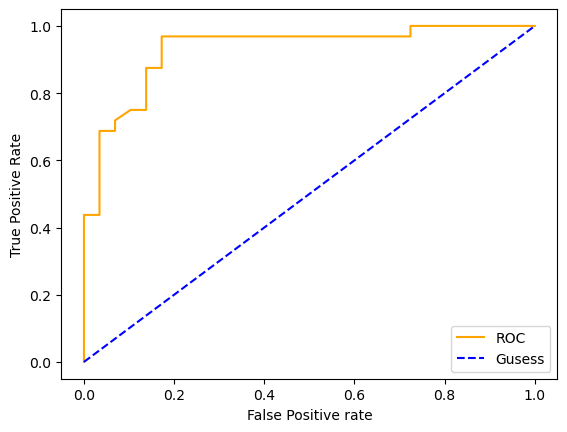

In [56]:
# create a function for plotting ROC curve 
def plot_roc_curve(fpr, tpr):
    # plot roc curve  
    plt.plot(fpr, tpr, color="orange", label='ROC')
    plt.plot([0,1],[0,1], color="blue", linestyle = "--", label="Gusess")
    plt.xlabel("False Positive rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)

In [57]:
from sklearn.metrics import roc_auc_score 

roc_auc_score(y_test, y_probs_positive)

0.9304956896551724

**Confusion Matrix**

* A Confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was suppose to predict. In essensce to give you an idea where the model is getting confused.

In [58]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [59]:
pd.crosstab(y_test, 
           y_preds, 
           rownames=["Actual label"], 
           colnames=["Predicted label"])

Predicted label,0,1
Actual label,,
0,24,5
1,4,28


In [60]:
 # how to install somwthing in conda from jupyter notebook 
# import sys 
# !conda install --yes --prefix C:\Users\dell\Desktop\AI_course\first_sample_project\env seaborn

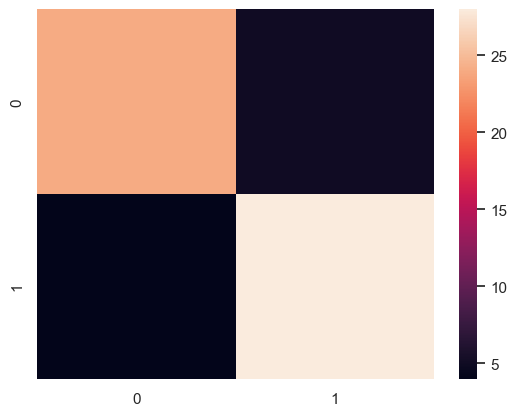

In [61]:
# Make confusion matrix more visual using seaborn  
import seaborn as sns 

# set the font scale 
sns.set(font_scale=1)

conf_matrix = confusion_matrix(y_test, y_preds) 

# plot confusion matrix 
sns.heatmap(conf_matrix);

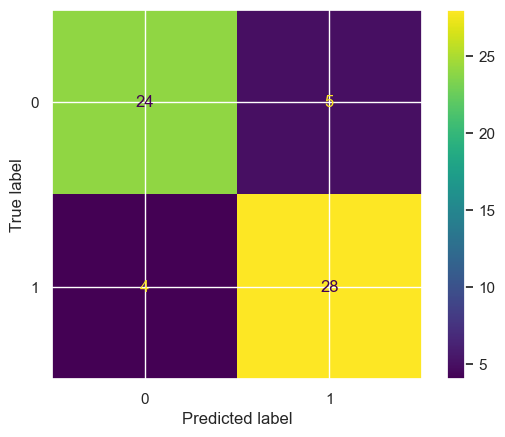

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay 

ConfusionMatrixDisplay.from_estimator(estimator=clf, X = X_test, y=y_test);

In [65]:
from sklearn.metrics import classification_report 

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [70]:
# where precision and recall become valuable 
disease_true = np.zeros(1000) 
disease_true[0] = 1 #only one positive case 
disease_true[1] = 1
disease_preds = np.zeros(1000) 
print(classification_report(disease_true, disease_preds, zero_division=
                           1.0))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       998
         1.0       1.00      0.00      0.00         2

    accuracy                           1.00      1000
   macro avg       1.00      0.50      0.50      1000
weighted avg       1.00      1.00      1.00      1000



## To summerize the classification metrics 

* **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1)
* **Precision** and **recall** become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision. 
* If false negative predictons are worse than false positives, aim for higher recall.
* **F1-score** is a combiniation of precision and recall.

# 4.2.2 Regression model evaluation metrics  

The ones that we are going to cover are: 
1. R^2 (pronounced r-squared) or cofficient of determination. 
2. Mean absolute error 
3. Mean squared error

What R-squared does: Compares your models predicitons to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example if ypu model does is predict the mean of the targets, it's R^2 vale would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [81]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split 

np.random.seed(42)
X = california_df.drop(columns="Target")
y = california_df.Target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

reg = RandomForestRegressor(n_estimators=100)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

In [83]:
reg.score(X_test, y_test)

0.8065734772187598

In [85]:
from sklearn.metrics import r2_score 

reg.score(X_test, y_test) == r2_score(y_true=y_test, y_pred = y_pred)

True

**Mean absolute error** 

MAE is teh average of the absolute differences between predictions and actual values.

It gives you an idea of how wrong your models predictions are.

In [90]:
from sklearn.metrics import mean_absolute_error 

mean_absolute_error(y_test, y_pred)

0.32659871732073664

#### **Mean Squared Error (MSE)** 

MSE is the mean of the squre of the errors between actual and predicted values.


In [91]:
from sklearn.metrics import mean_squared_error 

mean_squared_error(y_test, y_pred)

0.2534678520824551

In [88]:
y_test.mean()

2.0550030959302323

### 4.2.3 Finally using the scoring parameter 

In [92]:
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(reg, X, y, cv=5, scoring=None)
cv_score

array([0.50097272, 0.70273041, 0.74115332, 0.61556377, 0.68253631])

In [93]:
cv_mse = cross_val_score(reg, X, y, cv=3, scoring= "neg_mean_squared_error")
cv_mse 

array([-0.51636977, -0.32981693, -0.54394644])

In [94]:
cv_mae = cross_val_score(reg, X, y, cv=3, scoring= "neg_mean_absolute_error")
cv_mae

array([-0.51825687, -0.42321377, -0.50548043])

## 4.3 Using Different evaluation metrics as scikit-learn functions 

The 3rd way to evaluate sklearn machine learning models/estimators is to using the sklearn.metrices module

# 5. Improving a model 

First Predictions = baseline predictions 
First model = baseline model 

From a data perspective: 
* Could we collect more data? generally more the data, the better 
* Could we improve our data 

Form model prospective: 
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs parameters:
* Paramerters = model find these patterns in data 
* hyperparameters = settings one a model you can adjust to (potentially) improve it ability to find patternsm

Three ways to adjust hyperparameters: 
* By hand
* Randomly with RandomSearchCV
* Exhaustively with GridSearchCV

### 5.1 Tuning hyperparameters with hand

In [96]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### We are going to try and adjust  

* max_depth
* max_features
* min_samples_leaf
* min_samples_split
* n_estimators

In [99]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score 

def evaluation_function(y_true, y_preds):
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds) 
    recall = recall_score(y_true, y_preds) 

    metric = {"accuracy" : accuracy, 
             "precision" : precision,
             "f1_score" : f1, 
             "recall" : recall} 

    print(f"Accuracy = {accuracy*100:.2f}") 
    print(f"Precison = {precision*100:.2f}") 
    print(f"f1-score = {f1*100:.2f}") 
    print(f"Recall score = {recall*100:.2f}") 

    return metric

In [124]:
# creating train validation and test splits 
from sklearn.ensemble import RandomForestClassifier 

# shuffle the data 
np.random.seed(42)
heart_disease_shuffled = heart_disease.sample(frac=1)
X = heart_disease_shuffled.drop(columns = "target")
y = heart_disease_shuffled.target

# making splits  
train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(X_train_split + (0.15 * len(heart_disease_shuffled)))

X_train, y_train = X[:train_split], y[:train_split] 
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:] 

# train model 
clf = RandomForestClassifier() 
clf.fit(X_train, y_train) 

# predict  
y_preds = clf.predict(X_valid)

# Evaluate on valdation set  
baseline_metrics = evaluation_function(y_valid, y_preds)

Accuracy = 82.22
Precison = 81.48
f1-score = 84.62
Recall score = 88.00


In [156]:
# creating another model to evaluate hyperparameters 
np.random.seed(42)
clf_2 = RandomForestClassifier(n_estimators=100, max_depth=2)
clf_2.fit(X_train, y_train)
y_preds = clf_2.predict(X_valid)

validate_metrics = evaluation_function(y_valid, y_preds)

Accuracy = 84.44
Precison = 82.14
f1-score = 86.79
Recall score = 92.00


In [165]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split 

grid = {"n_estimators":[10,30,80,100,400], 
       "max_depth" : [2,5,10,20,30], 
       "max_features" : [None, "sqrt"], 
       "min_samples_split" : [2,4,6], 
       "min_samples_leaf" : [1,2,4]}

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

clf = RandomForestClassifier(n_jobs=-1)
rs_clf = RandomizedSearchCV(estimator=clf, 
                            param_distributions=grid, 
                            n_iter=10, 
                            n_jobs=-1, verbose=2) 
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


RandomizedSearchCV(estimator=RandomForestClassifier(n_jobs=-1), n_iter=450,
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 5, 10, 20, 30],
                                        'max_features': [None, 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 30, 80, 100, 400]},
                   verbose=2)

In [166]:
rs_clf.best_params_

{'n_estimators': 80,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10}

In [168]:
y_preds = rs_clf.predict(X_test)
best_metrics = evaluation_function(y_test, y_preds)

Accuracy = 83.61
Precison = 75.00
f1-score = 84.37
Recall score = 96.43


### we can use GridSearchCV instead of RandomiseSearchCV to check each and every combination of parameters to form a model

## Saving and laoding machine learing models 

Two ways to save and load the machine learing models: 
1. With python's "pickle" module 
2. With the "joblin" module

**Pickle**

In [170]:
import pickle 

# save an existing mdoel to file
pickle.dump(rs_clf, open("gs_random_forest_model.pkl", "wb"))

In [173]:
# load the saved model 
loaded_pickle_model = pickle.load(open("gs_random_forest_model.pkl", "rb"))

In [174]:
# Make some predictions 
pickle_y_preds = loaded_pickle_model.predict(X_test) 
evaluation_function(y_test, pickle_y_preds)

Accuracy = 83.61
Precison = 75.00
f1-score = 84.37
Recall score = 96.43


{'accuracy': 0.8360655737704918,
 'precision': 0.75,
 'f1_score': 0.8437499999999999,
 'recall': 0.9642857142857143}

**joblib**

In [176]:
from joblib import dump, load

dump(rs_clf, filename="joblin_random_forest_model.joblib")

['joblin_random_forest_model.joblib']

In [177]:
loaded_model = load("joblin_random_forest_model.joblib")
print(loaded_model.predict(X_test))

[0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1
 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0]


## 7. Putting it all togeather (pipelines)

In [203]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import pandas as pandas

car_sales = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales.dropna(subset=["Price"], inplace=True)

cat_features = ["Make", "Colour"]
cat_transformer = Pipeline(steps=[
                ("cat_imp", SimpleImputer(strategy="constant", fill_value="missing")),
                ("encoder", OneHotEncoder())
                ])

num_features = ["Odometer (KM)"]
num_transformer = Pipeline(steps = [
                ("num_imp", SimpleImputer(strategy="mean"))
                ])

door_features = ["Doors"]
door_transformer = Pipeline(steps=[
                ("door_imp", SimpleImputer(strategy="constant", fill_value=4))
                ])

preprocessor = ColumnTransformer(
                transformers=[
                    ("cat", cat_transformer, cat_features), 
                    ("num", num_transformer, num_features), 
                    ("door", door_transformer, door_features)
                ])

model = Pipeline(steps=[
        ("preprocessor", preprocessor), 
        ("model", RandomForestRegressor())
])

# split data  
X = car_sales.drop(columns=["Price"])
y = car_sales.Price 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model.fit(X_train, y_train) 
y_preds = model.predict(X_test)
model.score(X_test, y_test) 

0.15913932450511314

In [206]:
# Use GridSearchCV with our regression Pipeline 

pipe_grid = {
    "preprocessor__num__num_imp__strategy" : ["mean", "median"], 
    "model__n_estimators": [100, 1000], 
    "model__max_depth" : [None, 5], 
    "model__min_samples_split" : [2,4,6]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__num_imp__strategy=mean; total time=   0.9s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__num_imp__strategy=mean; total time=   0.8s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__num_imp__strategy=mean; total time=   0.6s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__num_imp__strategy=mean; total time=   0.6s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__num_imp__strategy=mean; total time=   0.6s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__num_imp__strategy=median; total time=   0.6s
[CV] END model__max_depth=None, model__min_samples_spl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('cat_imp',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder())]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('num',
                                                                         Pipeline(steps=[('num_imp',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)']),
                                                                        ('door',
                                                                         Pipeline(steps=[('door_imp',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__min_samples_split': [2, 4, 6],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__num_imp__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [208]:
gs_model.score(X_test, y_test)

0.2909369074910052